# Machine Learning, August 2018, Problem Set 1

## Linear regression

This assignment will introduce you to Python, basic data manipulation with numpy, and linear regression. Consider the height/age/weight data in the cell below.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

height = np.array([ 155.0, 146.0, 142.0, 150.0, 172.0, 161.0, 180.0, 130.0, 158.0, 161.0, 183.0, 158.0, 153.0, 164.0, 180.0, 154.0, 170.0, 148.0, 179.0, 144.0, 182.0, 161.0, 164.0, 156.0, 160.0, 163.0, 161.0, 165.0, 162.0, 144.0, 160.0, 162.0, 177.0, 166.0, 162.0, 165.0, 153.0, 185.0, 157.0, 168.0, 152.0, 173.0, 136.0, 169.0, 163.0, 142.0, 156.0, 152.0, 129.0, 162.0, 151.0, 186.0, 169.0, 161.0, 167.0, 136.0, 133.0, 192.0, 166.0, 168.0, 146.0, 127.0, 160.0, 161.0, 150.0, 149.0, 204.0, 170.0, 151.0, 164.0, 162.0, 161.0, 193.0, 156.0, 115.0, 161.0, 149.0, 165.0, 172.0, 173.0, 156.0, 167.0, 177.0, 137.0, 153.0, 166.0, 144.0, 165.0, 148.0, 177.0, 162.0, 150.0, 143.0, 161.0, 147.0, 177.0, 157.0, 170.0, 132.0, 173.0, 177.0, 179.0, 160.0, 164.0, 171.0, 140.0, 163.0, 136.0, 155.0, 174.0, 160.0, 133.0, 177.0, 159.0, 156.0, 166.0, 129.0, 123.0, 136.0, 148.0, 167.0, 158.0, 161.0, 134.0, 164.0, 156.0, 162.0, 147.0, 183.0, 169.0, 167.0, 193.0, 146.0, 178.0, 169.0, 169.0, 159.0, 140.0, 153.0, 164.0, 191.0, 173.0, 132.0, 164.0, 144.0, 154.0, 179.0, 177.0, 160.0, 187.0 ])
age = np.array([ 8.0, 51.0, 29.0, 27.0, 36.0, 30.0, 51.0, 50.0, 36.0, 32.0, 41.0, 18.0, 42.0, 38.0, 30.0, 28.0, 34.0, 45.0, 33.0, 24.0, 29.0, 52.0, 39.0, 47.0, 40.0, 38.0, 20.0, 40.0, 43.0, 23.0, 35.0, 35.0, 56.0, 39.0, 41.0, 24.0, 32.0, 32.0, 54.0, 33.0, 27.0, 19.0, 34.0, 35.0, 44.0, 44.0, 47.0, 32.0, 50.0, 35.0, 25.0, 39.0, 38.0, 40.0, 13.0, 48.0, 39.0, 31.0, 37.0, 44.0, 44.0, 44.0, 41.0, 39.0, 19.0, 38.0, 50.0, 31.0, 43.0, 38.0, 26.0, 39.0, 42.0, 38.0, 38.0, 32.0, 36.0, 35.0, 35.0, 39.0, 30.0, 34.0, 40.0, 46.0, 33.0, 36.0, 52.0, 41.0, 28.0, 45.0, 47.0, 9.0, 47.0, 43.0, 34.0, 36.0, 50.0, 43.0, 52.0, 30.0, 33.0, 34.0, 28.0, 49.0, 53.0, 21.0, 32.0, 50.0, 59.0, 19.0, 40.0, 30.0, 35.0, 35.0, 22.0, 51.0, 31.0, 41.0, 39.0, 40.0, 30.0, 45.0, 43.0, 34.0, 26.0, 28.0, 43.0, 30.0, 35.0, 47.0, 19.0, 61.0, 28.0, 39.0, 48.0, 30.0, 43.0, 28.0, 42.0, 58.0, 33.0, 24.0, 12.0, 34.0, 31.0, 36.0, 31.0, 21.0, 43.0, 33.0 ])
weight = np.array([ 47.0, 61.0, 55.0, 42.0, 65.0, 61.0, 67.0, 32.0, 60.0, 62.0, 69.0, 58.0, 65.0, 68.0, 74.0, 54.0, 65.0, 55.0, 70.0, 51.0, 74.0, 69.0, 66.0, 57.0, 51.0, 64.0, 55.0, 68.0, 64.0, 59.0, 57.0, 58.0, 74.0, 57.0, 64.0, 52.0, 48.0, 75.0, 61.0, 56.0, 53.0, 50.0, 49.0, 56.0, 61.0, 60.0, 67.0, 58.0, 53.0, 54.0, 49.0, 78.0, 59.0, 60.0, 66.0, 43.0, 43.0, 73.0, 70.0, 76.0, 61.0, 47.0, 61.0, 66.0, 50.0, 62.0, 89.0, 66.0, 59.0, 55.0, 60.0, 59.0, 78.0, 57.0, 31.0, 58.0, 52.0, 60.0, 64.0, 60.0, 58.0, 72.0, 69.0, 46.0, 54.0, 67.0, 65.0, 46.0, 56.0, 74.0, 56.0, 49.0, 53.0, 66.0, 57.0, 68.0, 64.0, 66.0, 45.0, 63.0, 64.0, 65.0, 57.0, 67.0, 69.0, 46.0, 60.0, 50.0, 57.0, 62.0, 51.0, 47.0, 74.0, 62.0, 52.0, 72.0, 43.0, 45.0, 48.0, 59.0, 66.0, 58.0, 67.0, 48.0, 65.0, 57.0, 64.0, 49.0, 78.0, 61.0, 59.0, 93.0, 42.0, 77.0, 63.0, 72.0, 57.0, 36.0, 53.0, 64.0, 73.0, 65.0, 38.0, 60.0, 54.0, 47.0, 65.0, 59.0, 54.0, 64.0 ])


## Problem 1

Make two plots from the height/age/weight data: one plotting height against weight, and another plotting age against weight. Would these two variables be useful in predicting weight?


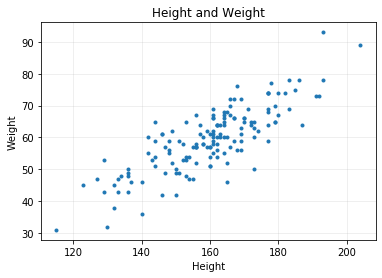

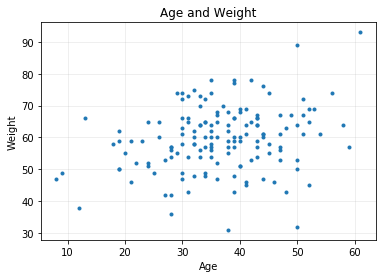

126.69844444444446
26.22622222222222


In [2]:
# Put your plotting code here and show the result.
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(height, weight, '.')
plt.title('Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

fig2 = plt.figure()
ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(age, weight, '.')
plt.title('Age and Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

cov_h_w = np.sum(((height - np.mean(height))* (weight - np.mean(weight)))/len(height))
cov_a_w = np.sum(((age - np.mean(age))* (weight - np.mean(weight)))/len(age))

print(cov_h_w)
print(cov_a_w)

## Problem 2

Make three linear regression models: one predicting weight from height, one predicting weight from age, and one predicting weight from both height and age. Report the mean squared error for each of the three models. For each model, make a scatter plot showing predicted vs. actual weight.


In [3]:
# Put your modeling and plotting code here and show the result.

def h(X,theta):
    return np.dot(X,theta)


def Cost(theta,X,y):
    return (1./(2*m))*(h(X,theta)-y).T.dot(h(X,theta)-y)

def analytical_solution(X_input, y):
    val1 = np.linalg.inv(np.dot(np.transpose(X_input),X_input))
    val2 = np.dot(np.transpose(X_input),y)
    theta = np.dot(val1,val2)
    return theta

def mean_squared_error(y, y_predicted):
    return np.sum(np.power(y - y_predicted, 2)) / y.shape[0]



In [4]:
height = np.array([height])
age = np.array([age])
weight = np.array([weight])
print(height.shape)
print(weight.shape)
print(age.shape)
height = np.transpose(height)
age = np.transpose(age)
weight = np.transpose(weight)
print(height.shape)
print(weight.shape)
print(age.shape)

y1 = weight
x1 = height
m = y1.shape[0]

print(x1.shape)
print(y1.shape)




(1, 150)
(1, 150)
(1, 150)
(150, 1)
(150, 1)
(150, 1)
(150, 1)
(150, 1)


In [5]:
X1 = np.insert(x1, 0, 1, axis=1)
print(X1.shape)



(150, 2)


In [6]:
theta_analytical_1 = analytical_solution(X1,y1)
print(theta_analytical_1)



[[-25.14601758]
 [  0.52987376]]


(150,)
(1, 150)
(150, 1)


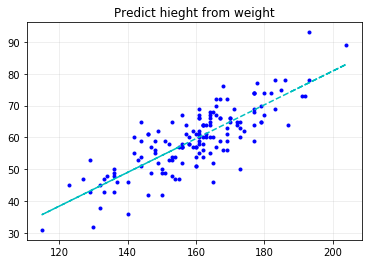

34.2580410827358


In [7]:
y_analytical_1 = theta_analytical_1[0]*X1[:,0] + theta_analytical_1[1]*X1[:,1]
#print(y_analytical_1)
print(y_analytical_1.shape)
y_analytical_1 = np.array([y_analytical_1])
print(y_analytical_1.shape)
y_analytical_1 = np.transpose(y_analytical_1)
print(y_analytical_1.shape)

fig3 = plt.figure()
ax = plt.axes()
plt.title('Predict hieght from weight')
plt.grid(axis='both', alpha=.25)
plt.plot(x1,y1,'b.')
plt.plot(X1[:,1],y_analytical_1,'c--')
plt.show()

mse_1 = mean_squared_error(weight, y_analytical_1)
print(mse_1)

[[49.83501444]
 [ 0.26657192]]


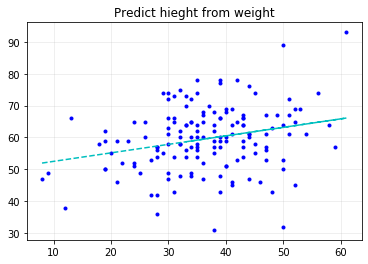

94.4010478081794


In [8]:
y2 = weight
x2 = age
X2 = np.insert(x2, 0, 1, axis=1)
m = y2.shape[0]
theta_analytical_2 = analytical_solution(X2,y2)
print(theta_analytical_2)
y_analytical_2 = theta_analytical_2[0]*X2[:,0] + theta_analytical_2[1]*X2[:,1]
y_analytical_2 = np.array([y_analytical_2])
y_analytical_2 = np.transpose(y_analytical_2)

fig4 = plt.figure()
ax = plt.axes()
plt.title('Predict hieght from weight')
plt.grid(axis='both', alpha=.25)
plt.plot(x2,y2,'b.')
plt.plot(X2[:,1],y_analytical_2,'c--')
plt.show()
mse_2 = mean_squared_error(weight, y_analytical_2)
print(mse_2)

In [9]:
y3 = weight
x31 = height
x32 = age
X3 = np.array([list(x31[:,0]), list(x32[:,0])])
print(X3.shape)
X3 = np.transpose(X3)
print(X3.shape)
X3 = np.insert(X3, 0, 1, axis=1)
print(X3.shape)



(2, 150)
(150, 2)
(150, 3)


In [10]:
theta_analytical_3 = analytical_solution(X3,y3)
print(theta_analytical_3.shape)
y_analytical_3 = theta_analytical_3[0,0]*X3[:,0] + theta_analytical_3[1,0]*X3[:,1]+ theta_analytical_3[2,0]*X3[:,2]
y_analytical_3 = np.array([y_analytical_3])
y_analytical_3 = np.transpose(y_analytical_3)
mse_3 = mean_squared_error(X3, y_analytical_3)
print(mse_3)

(3, 1)
14275.341595404689


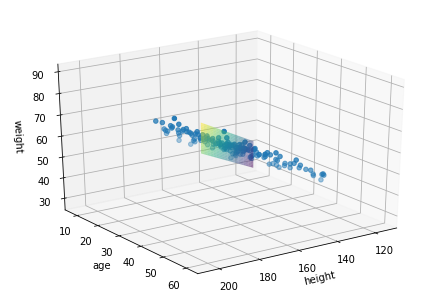

In [11]:
xx1 = np.linspace(np.min(height), np.max(height), 20)
xx2 = np.linspace(np.min(age), np.max(age), 20)
z = np.ones((20,20))
for i in range(len(xx1)):
    for j in range(len(xx2)):
            z[j][i] = theta_analytical_3[2,0]* xx2[j] +  theta_analytical_3[1,0]* xx1[i] + theta_analytical_3[0,0]
#xx31, xx32 = np.meshgrid(height_range, age_range)
#Y = np.ones((X1.shape))
#y_predicted = theta_analytical_3[0][0] + theta_analytical_3[1][0]*xx31+ theta_analytical_3[2][0]*xx32
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x31,x32,y_analytical_3,'.')
ax.set_xlabel('height')
ax.set_ylabel('age')
ax.set_zlabel('weight')
cm = plt.cm.get_cmap('viridis')
ax.plot_surface(xx1,xx2,z, cmap=cm, alpha = .5)
ax.view_init(elev=25, azim=55)
plt.show()


## Problem 3

Implement batch gradient descent for the 2-variable model (predicting weight from height and age). Starting from (0,0,0) (intercept, height-coefficient, and age-coefficient), plot mean squared error as a function of iteration. Try to find the step size giving the best convergence.


Solution batch cost function
$\theta ^k+1 \gets \theta^k = \sum(i+1)^m (h_(\theta)(\mathbf(x) - y^((i))) \mathbf(x^i) $


In [31]:
# Put your code here and show the result.
# let initial theta be (0,0,0)
theta = np.matrix([[0,0,0]]).T

#Geet the cost for current theta

X = np.concatenate([np.ones((m,1)), height, age], 1)
cost = Cost(theta, X, weight)
print("Initial cost: %f" % cost[0,0])

# calculate batch gradient

def htheta(theta, X):
    return theta.T * X.T

# print(h(theta.T, X))

def gradient(theta, X, y):
    errors = htheta(theta, X) - weight.T
    errors = np.tile(errors.T, [1,3])
    gradient = sum(np.multiply(errors, X)).T
    return gradient
# take a step in the opposite direction of the gradient
learning_rate = 0.000001
for i in range(1,100):
    grad = gradient(theta, X, weight)
    theta = theta - learning_rate * grad
    cost = Cost(theta, X, weight)
    print("New cost: %f" % cost[0,0])
    

#     print("Final theta: %f, %f, %f")

Initial cost: 1824.790000
New cost: 17026.358752
New cost: 160202.490084
New cost: 1508707.708669
New cost: 14209611.262120
New cost: 133833138.138704
New cost: 1260507954.204248
New cost: 11872100625.251688
New cost: 111817441916.218231
New cost: 1053153163651.582397
New cost: 9919128601519.009766
New cost: 93423364815945.953125
New cost: 879908452060000.750000
New cost: 8287422375891583.000000
New cost: 78055131162379536.000000
New cost: 735162662699549312.000000
New cost: 6924133398778806272.000000
New cost: 65214986773176156160.000000
New cost: 614227695349663399936.000000
New cost: 5785106773796623220736.000000
New cost: 54487058525056464322560.000000
New cost: 513186646815257837699072.000000
New cost: 4833451127635727934816256.000000
New cost: 45523884824799991310581760.000000
New cost: 428766948256158304113262592.000000
New cost: 4038343753491531424017154048.000000
New cost: 38035161846526106780638904320.000000
New cost: 358234371563998170481300602880.000000
New cost: 3374032309

## Problem 4

Implement stochastic gradient descent for the 2-variable model (predicting weight from height and age). Starting from (0,0,0), plot mean squared error as a function of iteration (one pass through the data set per iteration).


In [13]:
# Put your code here and show the result.

## Turn it in

After you've finished, download this notebook as PDF and submit via Gradescope.

For PDF export, in Ubuntu, you may need to install some needed packages:

    sudo apt install pandoc texlive-xetex
